In [87]:
import pandas as pd
# load data from csv file
filename = r"C:\Users\DevRo\Downloads\output.csv"
#convert csv to dataframe
reviews_df= pd.read_csv(filename)

In [88]:
reviews_df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [89]:
print(reviews_df.columns)

Index(['Review', 'Liked'], dtype='object')


In [90]:
reviews_df.columns = reviews_df.columns.str.strip()

In [91]:
#download nltk libraries for data preprocessing

import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
# Download stopwords and lemmatizer data from NLTK
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')
print(nltk.data.find('corpora/omw-1.4.zip'))
# Download Open Multilingual Wordnet (OMW)
nltk.download('omw')

# Load the English stopwords
nltk.download('stopwords')
stopwords = stopwords.words('english')

# Initialize the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

C:\Users\DevRo\AppData\Roaming\nltk_data\corpora\omw-1.4.zip


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DevRo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DevRo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DevRo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\DevRo\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package omw to
[nltk_data]     C:\Users\DevRo\AppData\Roaming\nltk_data...
[nltk_data]   Package omw is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DevRo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [92]:

# Remove punctuation
reviews_df['Review'] = reviews_df['Review'].str.replace('[^\w\s]','')

# Convert all text to lowercase
reviews_df['Review'] = reviews_df['Review'].str.lower()

# Vectorize the text data using a bag-of-words model
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(reviews_df['Review'])
y = reviews_df['Liked']


C:\Users\DevRo\AppData\Local\Temp\ipykernel_25304\3433519679.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  reviews_df['Review'] = reviews_df['Review'].str.replace('[^\w\s]','')


In [93]:
reviews_df

,Review,Liked
0,wow loved this place,1
1,crust is not good,0
2,not tasty and the texture was just nasty,0
3,stopped by during the late may bank holiday of...,1
4,the selection on the menu was great and so wer...,1
...,...,...
995,i think food should have flavor and texture an...,0
996,appetite instantly gone,0
997,overall i was not impressed and would not go back,0
998,the whole experience was underwhelming and i t...,0


In [94]:
import csv
import random

class NaiveBayesClassifier:
    
    def __init__(self):
        self.positive_word_counts = {}
        self.negative_word_counts = {}
        self.total_positive_words = 0
        self.total_negative_words = 0
        
    def train(self, train_data):
        for review, label in train_data:
            words = review.split()
            for word in words:
                if label == 1:
                    self.positive_word_counts[word] = self.positive_word_counts.get(word, 0) + 1
                    self.total_positive_words += 1
                else:
                    self.negative_word_counts[word] = self.negative_word_counts.get(word, 0) + 1
                    self.total_negative_words += 1
    
    def classify(self, test_data):
        predictions = []
        for review, _ in test_data:
            words = review.split()
            positive_prob = 1
            negative_prob = 1
            for word in words:
                positive_prob *= (self.positive_word_counts.get(word, 0) + 1) / (self.total_positive_words + len(self.positive_word_counts))
                negative_prob *= (self.negative_word_counts.get(word, 0) + 1) / (self.total_negative_words + len(self.negative_word_counts))
            if positive_prob > negative_prob:
                predictions.append(1)
            else:
                predictions.append(0)
        return predictions
    
    def train_test_split(self, csv_file_path, test_size=0.2):
        with open(csv_file_path, 'r') as csv_file:
            csv_reader = csv.reader(csv_file)
            next(csv_reader) # Skip the header row
            data = [(row[0], int(row[1])) for row in csv_reader]
            random.shuffle(data)
            split_index = int(len(data) * (1 - test_size))
            train_data = data[:split_index]
            test_data = data[split_index:]
        return train_data, test_data
    
    def evaluate(self, test_data):
        predictions = self.classify(test_data)
        correct_predictions = 0
        for i in range(len(test_data)):
            if predictions[i] == test_data[i][1]:
                correct_predictions += 1
        accuracy = correct_predictions / len(test_data)
        return accuracy
   

In [95]:
classifier1 = NaiveBayesClassifier()
train_data, test_data = classifier1.train_test_split(filename, test_size=0.2)
classifier1.train(train_data)
accuracy = classifier1.evaluate(test_data)
print('Accuracy:', accuracy)


Accuracy: 0.72


In [96]:
predictions = classifier1.classify(test_data)
print(predictions)

[0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1]


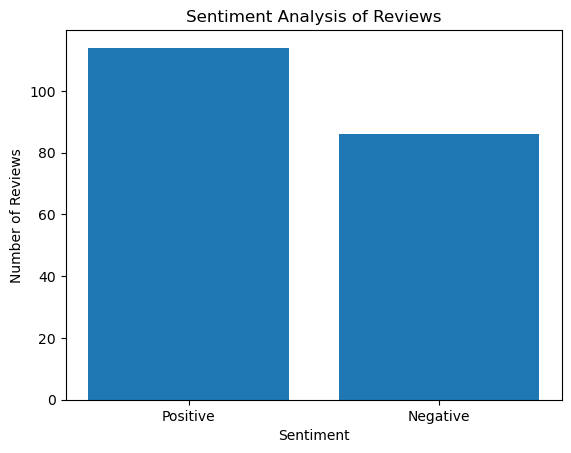

In [97]:

import pandas as pd
import matplotlib.pyplot as plt

# Convert test data to a Pandas DataFrame
test_data_df = pd.DataFrame({'review': test_data})

# Make predictions on test data and add predictions to DataFrame
predictions = classifier1.classify(test_data_df['review'])
test_data_df['sentiment'] = predictions

# Count the number of positive and negative reviews
positive_reviews = test_data_df[test_data_df['sentiment'] == 1]['review'].count()
negative_reviews = test_data_df[test_data_df['sentiment'] == 0]['review'].count()

# Visualize the counts using a bar chart
plt.bar(['Positive', 'Negative'], [positive_reviews, negative_reviews])
plt.title('Sentiment Analysis of Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()

In [98]:
print(negative_reviews)

86


In [99]:
print(positive_reviews)

114


In [100]:
import csv
import math
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000, print_loss=False):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.print_loss = print_loss
        self.weights = None
        self.bias = None
    
    def fit(self, X, y):
        # initialize weights and bias
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # gradient descent
        for i in range(self.num_iterations):
            # calculate predicted values and gradient
            y_pred = self.sigmoid(np.dot(X, self.weights) + self.bias)
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)
            
            # update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            
            # print loss for each 100 iterations
            if self.print_loss and i % 100 == 0:
                loss = self.compute_loss(X, y)
                print(f"Iteration {i}: Loss={loss}")
    
    def predict(self, X):
        # predict binary values (0 or 1)
        y_pred = np.round(self.sigmoid(np.dot(X, self.weights) + self.bias))
        return y_pred.astype(int)
    
    def sigmoid(self, z):
        # sigmoid activation function
        return 1 / (1 + np.exp(-z))
    
    def compute_loss(self, X, y):
        # compute cross-entropy loss
        y_pred = self.sigmoid(np.dot(X, self.weights) + self.bias)
        loss = -(1 / len(y)) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
        return loss
    
    def load_data(self, csv_file):
        # load data from csv file
        X, y = [], []
        with open(csv_file, 'r') as f:
            reader = csv.reader(f)
            next(reader)
            for row in reader:
                X.append(row[0])
                y.append(int(row[1]))
        vectorizer = CountVectorizer(lowercase=True, stop_words='english')
        X = vectorizer.fit_transform(X)
        y = np.array(y)
        return X.toarray(), y


In [101]:

import csv
import numpy as np
from sklearn.model_selection import train_test_split


lr = LogisticRegression()
X, y = lr.load_data(filename)


In [102]:
# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# train the model
lr.fit(X_train, y_train)

# make predictions on test set
y_pred = lr.predict(X_test)

# calculate accuracy
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.725


In [103]:
y_pred

array([0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1])

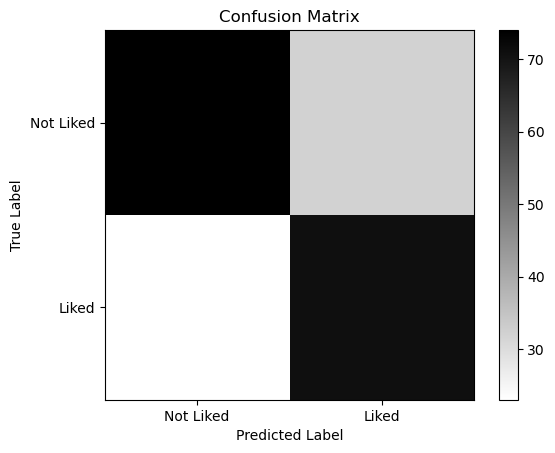

In [104]:
from sklearn.metrics import confusion_matrix,roc_curve,auc
# plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap='binary', interpolation='None')
plt.colorbar()
plt.xticks([0,1], ['Not Liked', 'Liked'])
plt.yticks([0,1], ['Not Liked', 'Liked'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

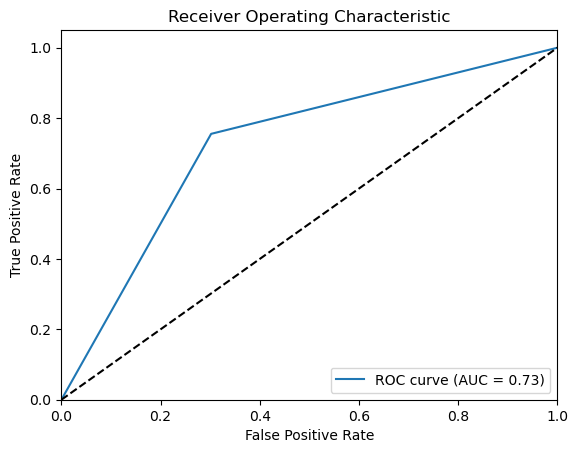

In [105]:
# plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [106]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


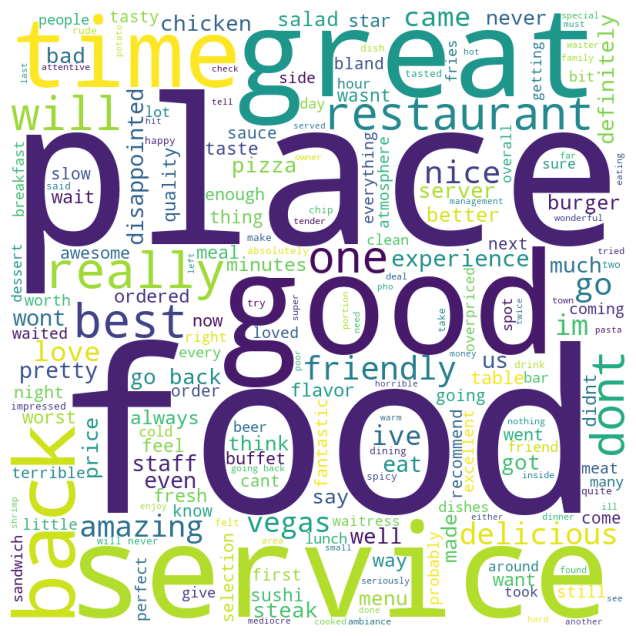

In [107]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# concatenate all the reviews into a single string
reviews = ' '.join(reviews_df['Review'])

# generate word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(reviews)

# plot the word cloud
plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [108]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

class DecisionTree:
    def __init__(self, max_depth=10):
        self.max_depth = max_depth
        self.feature = None
        self.threshold = None
        self.left = None
        self.right = None
        self.label = None

    def fit(self, X, y):
        if len(set(y)) == 1:
            self.label = y[0]
        elif self.max_depth == 0:
            self.label = np.bincount(y).argmax()
        else:
            n_features = X.shape[1]
            best_gain = 0
            for f in range(n_features):
                feature_values = X[:, f]
                thresholds = np.unique(feature_values)
                for t in thresholds:
                    gain = self._information_gain(X, y, f, t)
                    if gain > best_gain:
                        best_gain = gain
                        self.feature = f
                        self.threshold = t
            if self.feature is not None:
                left_idxs = X[:, self.feature] <= self.threshold
                X_left, y_left = X[left_idxs], y[left_idxs]
                X_right, y_right = X[~left_idxs], y[~left_idxs]
                self.left = DecisionTree(max_depth=self.max_depth-1)
                self.right = DecisionTree(max_depth=self.max_depth-1)
                self.left.fit(X_left, y_left)
                self.right.fit(X_right, y_right)
            else:
                self.label = np.bincount(y).argmax()

    def predict(self, X):
        if self.label is not None:
            return np.full(X.shape[0], self.label)
        else:
            left_idxs = X[:, self.feature] <= self.threshold
            y = np.zeros(X.shape[0])
            y[left_idxs] = self.left.predict(X[left_idxs])
            y[~left_idxs] = self.right.predict(X[~left_idxs])
            return y

    def _entropy(self, y):
        _, counts = np.unique(y, return_counts=True)
        p = counts / len(y)
        return -np.sum(p * np.log2(p))

    def _information_gain(self, X, y, feature, threshold):
        left_idxs = X[:, feature] <= threshold
        H_parent = self._entropy(y)
        H_left = self._entropy(y[left_idxs])
        H_right = self._entropy(y[~left_idxs])
        n_left = len(y[left_idxs])
        n_right = len(y[~left_idxs])
        H_children = (n_left / len(y)) * H_left + (n_right / len(y)) * H_right
        return H_parent - H_children


class RandomForest:
    def __init__(self, n_estimators=100, max_depth=10, min_samples_split=5, max_features=None):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.max_features = max_features
        self.trees = []

    def fit(self, X, y):
        n_samples = X.shape[0]
        n_features = X.shape[1]
        if self.max_features is None:
            self.max_features = int(np.sqrt(n_features))
        for i in range(self.n_estimators):
            tree = DecisionTree(max_depth=self.max_depth)
            idxs = np.random.choice(n_samples, n_samples, replace=True)
            X_sub = X[idxs]
            y_sub = y[idxs]
            tree.fit(X_sub, y_sub)
            self.trees.append(tree)
            
    def predict(self, X):
        y_preds = []
        for tree in self.trees:
            y_preds.append(tree.predict(X))
        y_preds = np.array(y_preds)
        y_pred = []
        for i in range(X.shape[0]):
            labels, counts = np.unique(y_preds[:, i], return_counts=True)
            y_pred.append(labels[np.argmax(counts)])
        return np.array(y_pred)

    def score(self, X, y):
        y_pred = self.predict(X)
        return np.mean(y_pred == y)


In [109]:


class RestaurantReviewClassifier:
    def __init__(self, n_estimators=100, max_depth=10, min_samples_split=4, max_features=None):
        self.vectorizer = CountVectorizer(stop_words='english')
        self.rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split, max_features=max_features)

    def preprocess_data(self, filename):
        data = pd.read_csv(filename)
        data['Review'] = data['Review'].str.lower()
        X = self.vectorizer.fit_transform(data['Review'])
        y = data['Liked']
        return X, y

    def fit(self, X, y):
        self.rf.fit(X, y)

    def predict(self, X):
        return self.rf.predict(X)



In [110]:
clf = RestaurantReviewClassifier()
X, y = clf.preprocess_data(filename)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy:', (y_pred == y_test).mean())

Accuracy: 0.685


In [111]:
y_pred

array([0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1], dtype=int64)

C:\Users\DevRo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


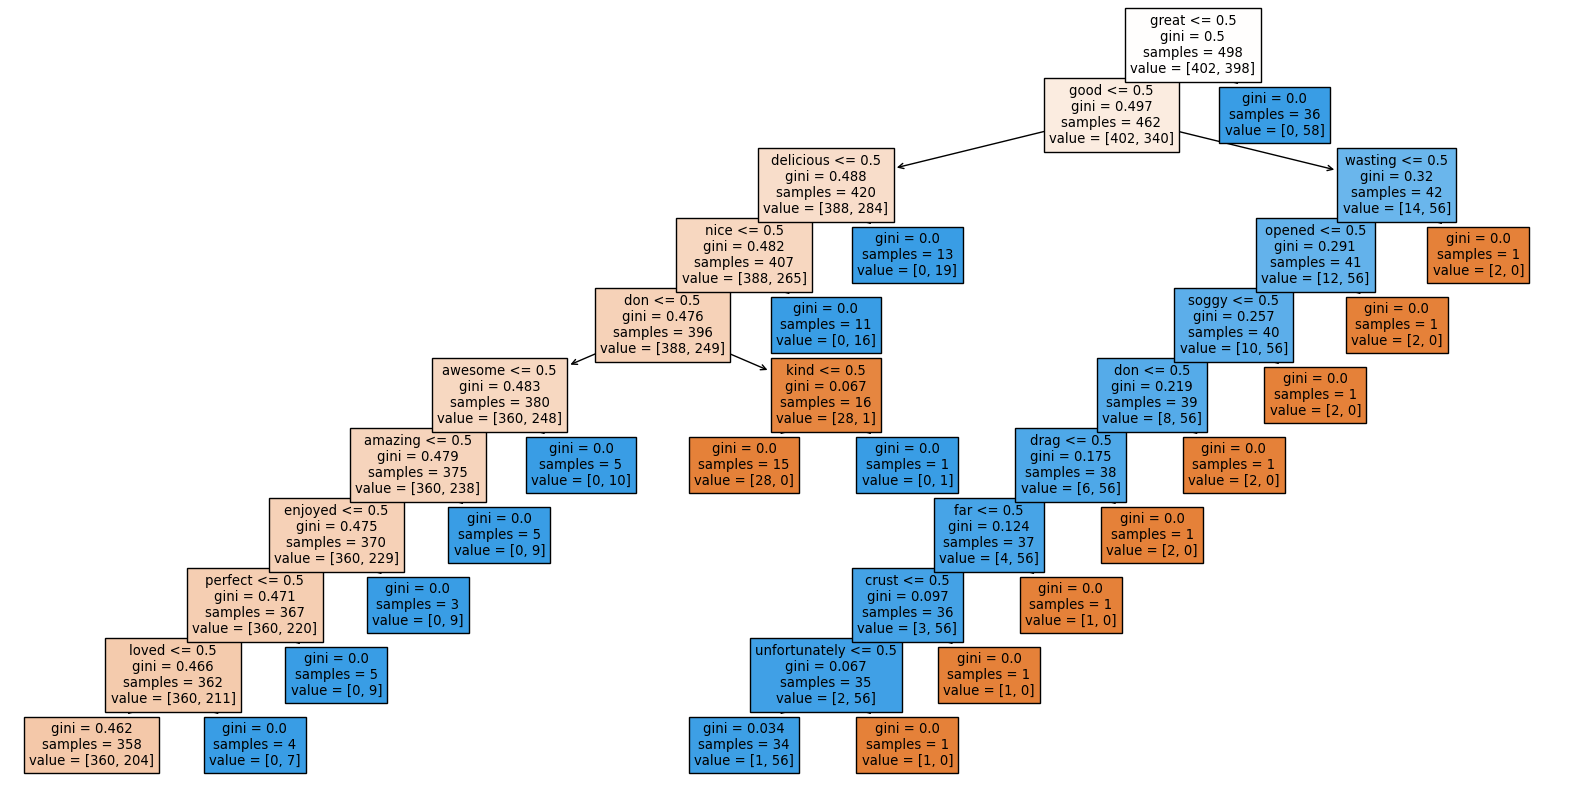

In [112]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


plt.figure(figsize=(20,10))
plot_tree(clf.rf.estimators_[0], feature_names=clf.vectorizer.get_feature_names(), filled=True)
plt.show()
